# EDA for Credit card Fraud data set
## background
The credit card data set comes from the European credit card tansaction data during two days in September 2013. In the total number of 284,807 times of transactions, 492 cases of fraud were discovered, which means the data set is extremely unbalanced, and fraud frequency only accounts for 0.172% of the total transactions.
<br>
This data set has 31 columns. V1, V2,,... ,V28 are the main features which are processed by PCA because of its sensibility, 'Time' is the time in seconds between each transaction and the first transaction. 'Amount' represents the transaction amount. 'Class' represents the response variable, 1 means fraud, and 0 means normal.
## Load data set

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from pandas.plotting import _converter
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [15]:
data = pd.read_csv("creditcard.csv")

## Basic information
> non-null clean data
<br>
> 284807 entries, 31 columns

In [16]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Category attributes

From the following picture, it can be seen that fraudulent activity occurs at a smaller amount of transaction. The smaller the amount, the higher the number of fraud transactions. 2125.87 is max value of the amount when fraud occured.
<br>
Column of 'Time' is transformed to hour, it can be seen in the picture that a fraud transaction are most possibly occured in 6 and 20.

In [19]:
print ("Fraud")
print (data.Amount[data.Class == 1].describe())
print ()
print ("Normal")
print (data.Amount[data.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
()
Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


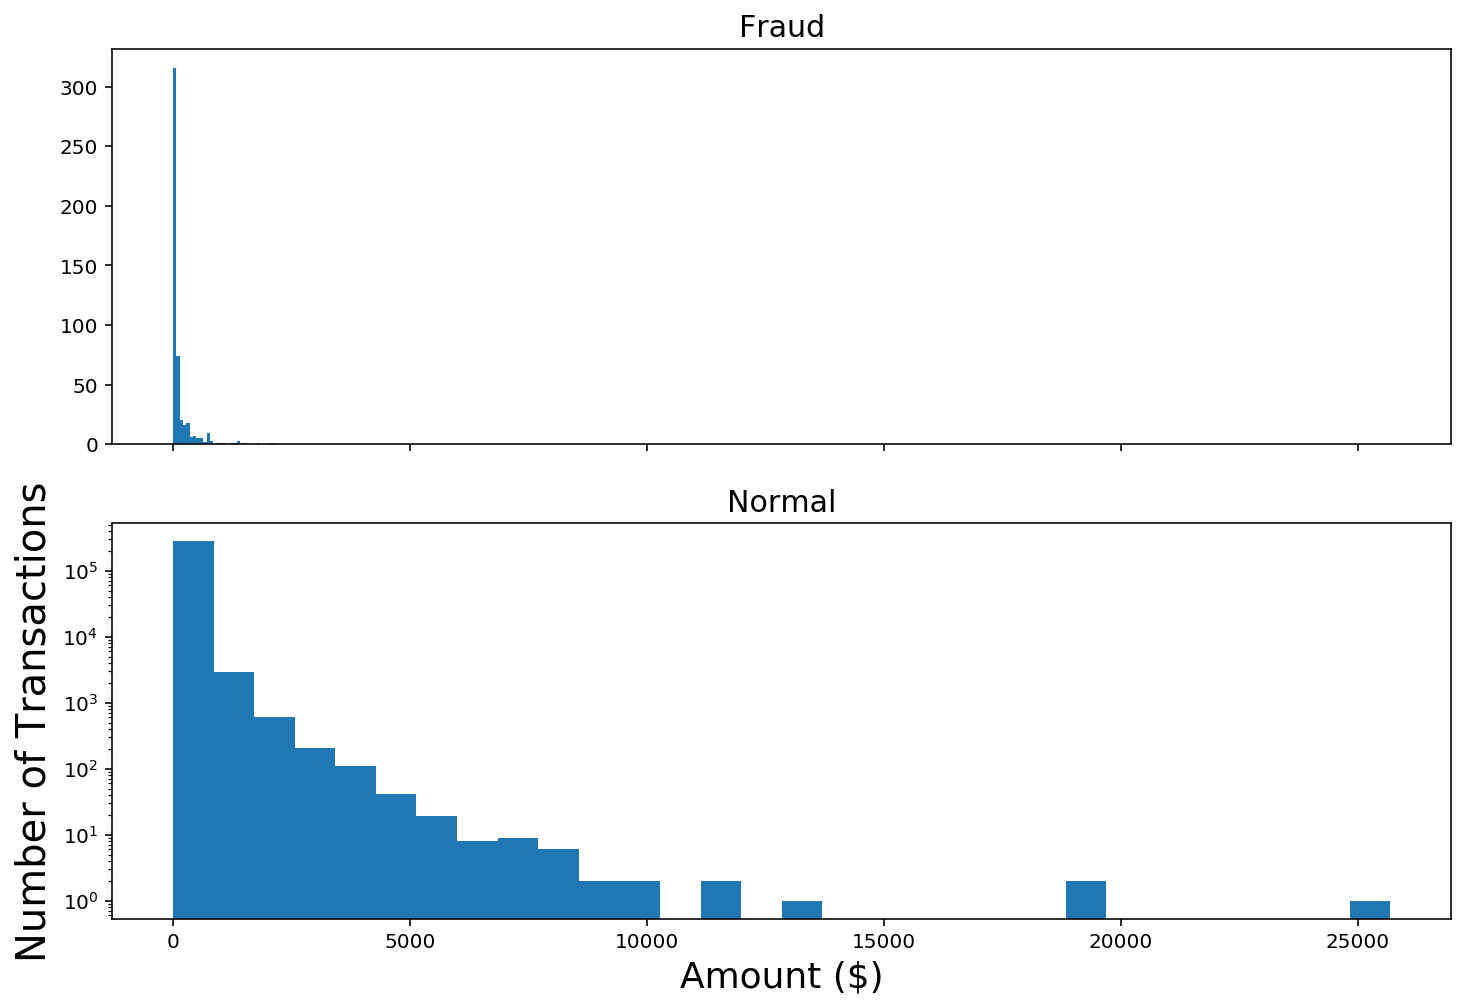

In [26]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))
bins = 30
ax1.hist(data.Amount[data.Class == 1], bins = bins)
ax1.set_title('Fraud',fontsize = 15)

ax2.hist(data.Amount[data.Class == 0], bins = bins)
ax2.set_title('Normal',fontsize = 15)

plt.xlabel('Amount ($)',fontsize = 18)
plt.ylabel('Number of Transactions',fontsize = 20)
plt.yscale('log')
plt.show()

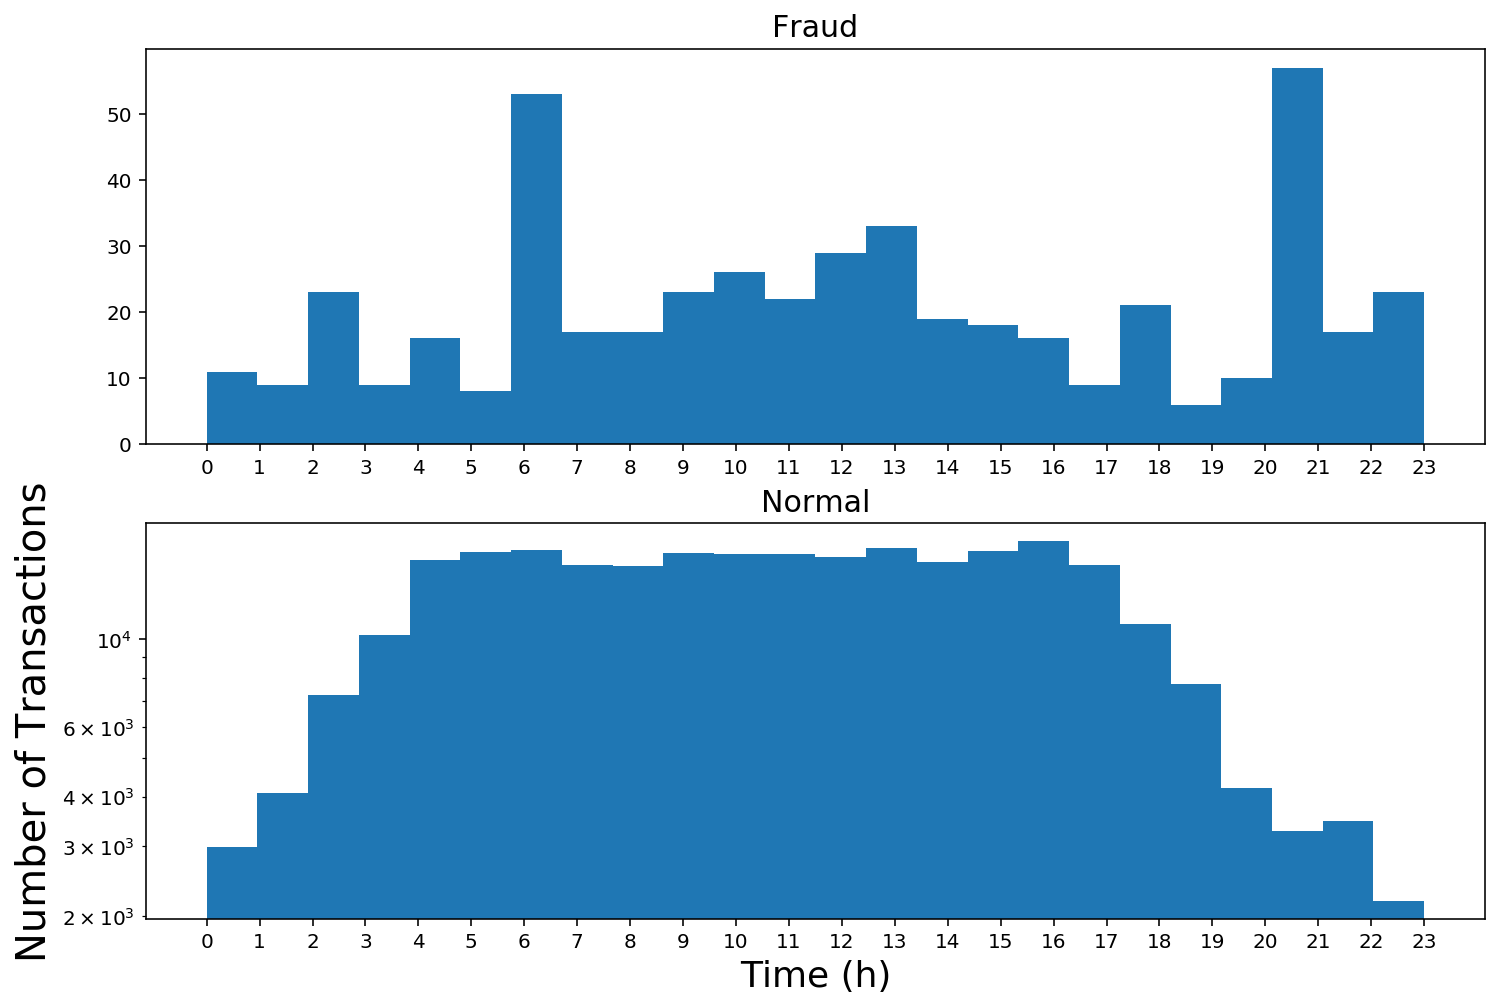

In [88]:
def convert_totime(seconds):
    return datetime.datetime.fromtimestamp(seconds);
timedata = data.copy()
timedata['datetime'] = timedata.Time.apply(convert_totime)
timedata['hour_of_the_day'] = timedata.datetime.dt.hour
f, (ax1, ax2) = plt.subplots(2, 1,figsize=(12,8))

ax1.hist(timedata.hour_of_the_day[timedata.Class == 1],bins=24)
ax1.set_title('Fraud',fontsize = 15)

ax2.hist(timedata.hour_of_the_day[timedata.Class == 0],bins=24)
ax2.set_title('Normal',fontsize = 15)

ax1.set_xticks([i for i in range(0,24)])
ax2.set_xticks([i for i in range(0,24)])
plt.xlabel('Time (h)',fontsize = 18)
plt.ylabel('Number of Transactions',fontsize = 20)
plt.yscale('log')
plt.show()

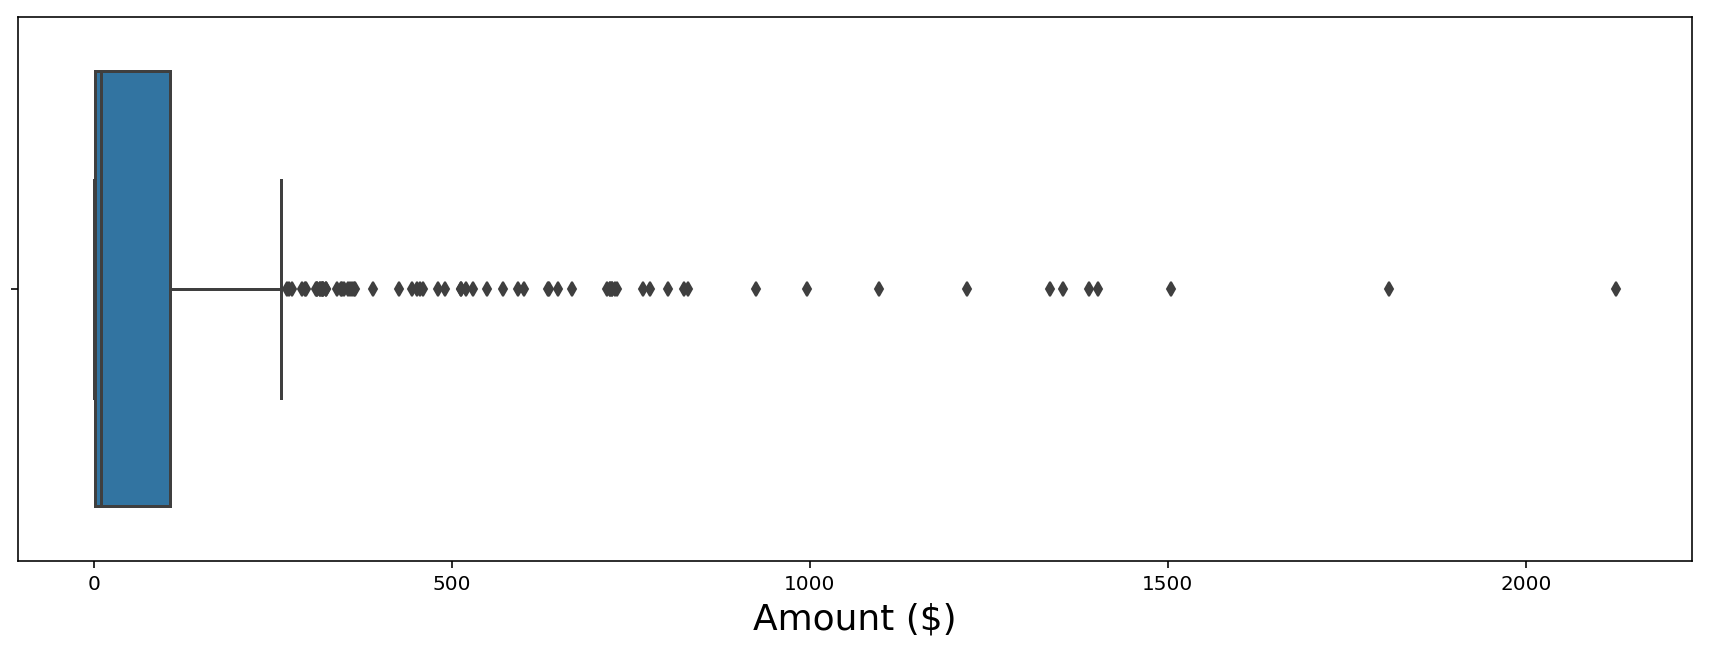

In [47]:
plt.figure(figsize=(15,5))
sns.boxplot(data.Amount[data.Class == 1])
plt.xlabel("Amount ($)",fontsize = 18)
plt.show()

## Category distribution

([<matplotlib.axis.XTick at 0x1a0edace90>,
 <a list of 2 Text xticklabel objects>)

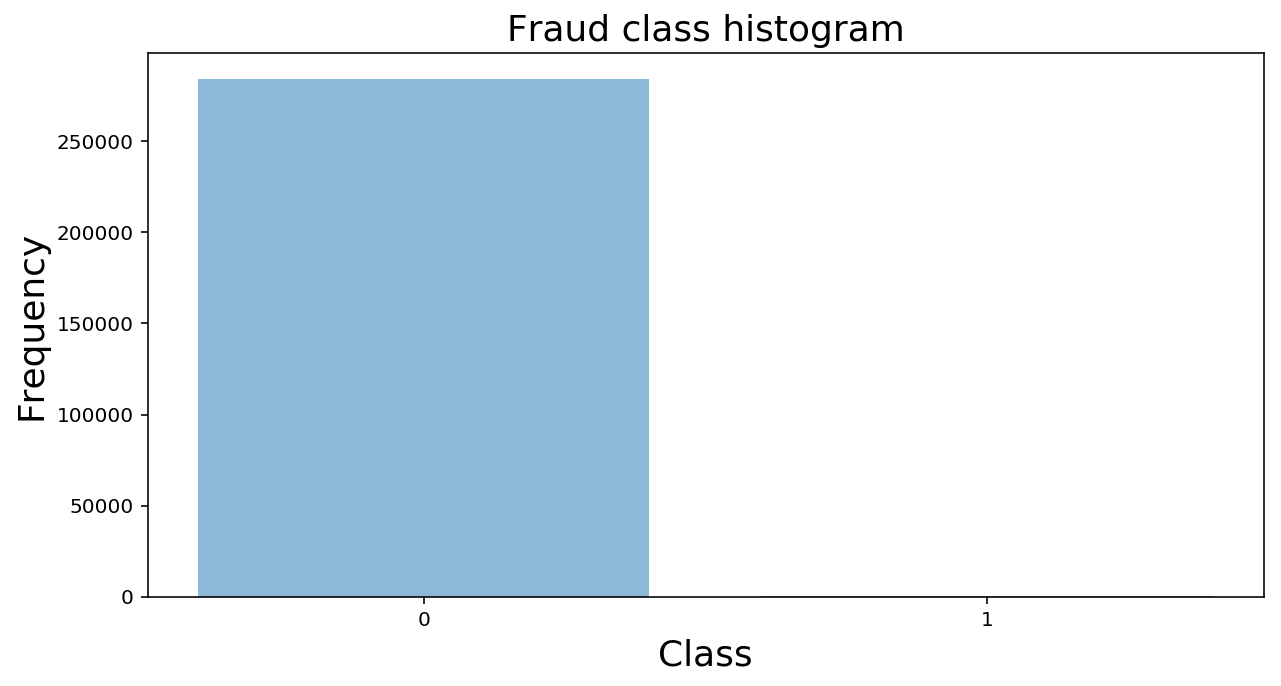

In [65]:
count_classes = pd.DataFrame(pd.value_counts(data['Class'], sort = True).sort_index())
plt.figure(figsize=(10,5))
plt.bar(count_classes.index,count_classes.values.flatten(),align='center', alpha=0.5)
plt.title("Fraud class histogram",fontsize = 18)
plt.xlabel("Class",fontsize = 18)
plt.ylabel("Frequency",fontsize = 18)
plt.xticks([0,1])

## Pair-Wise Relationship

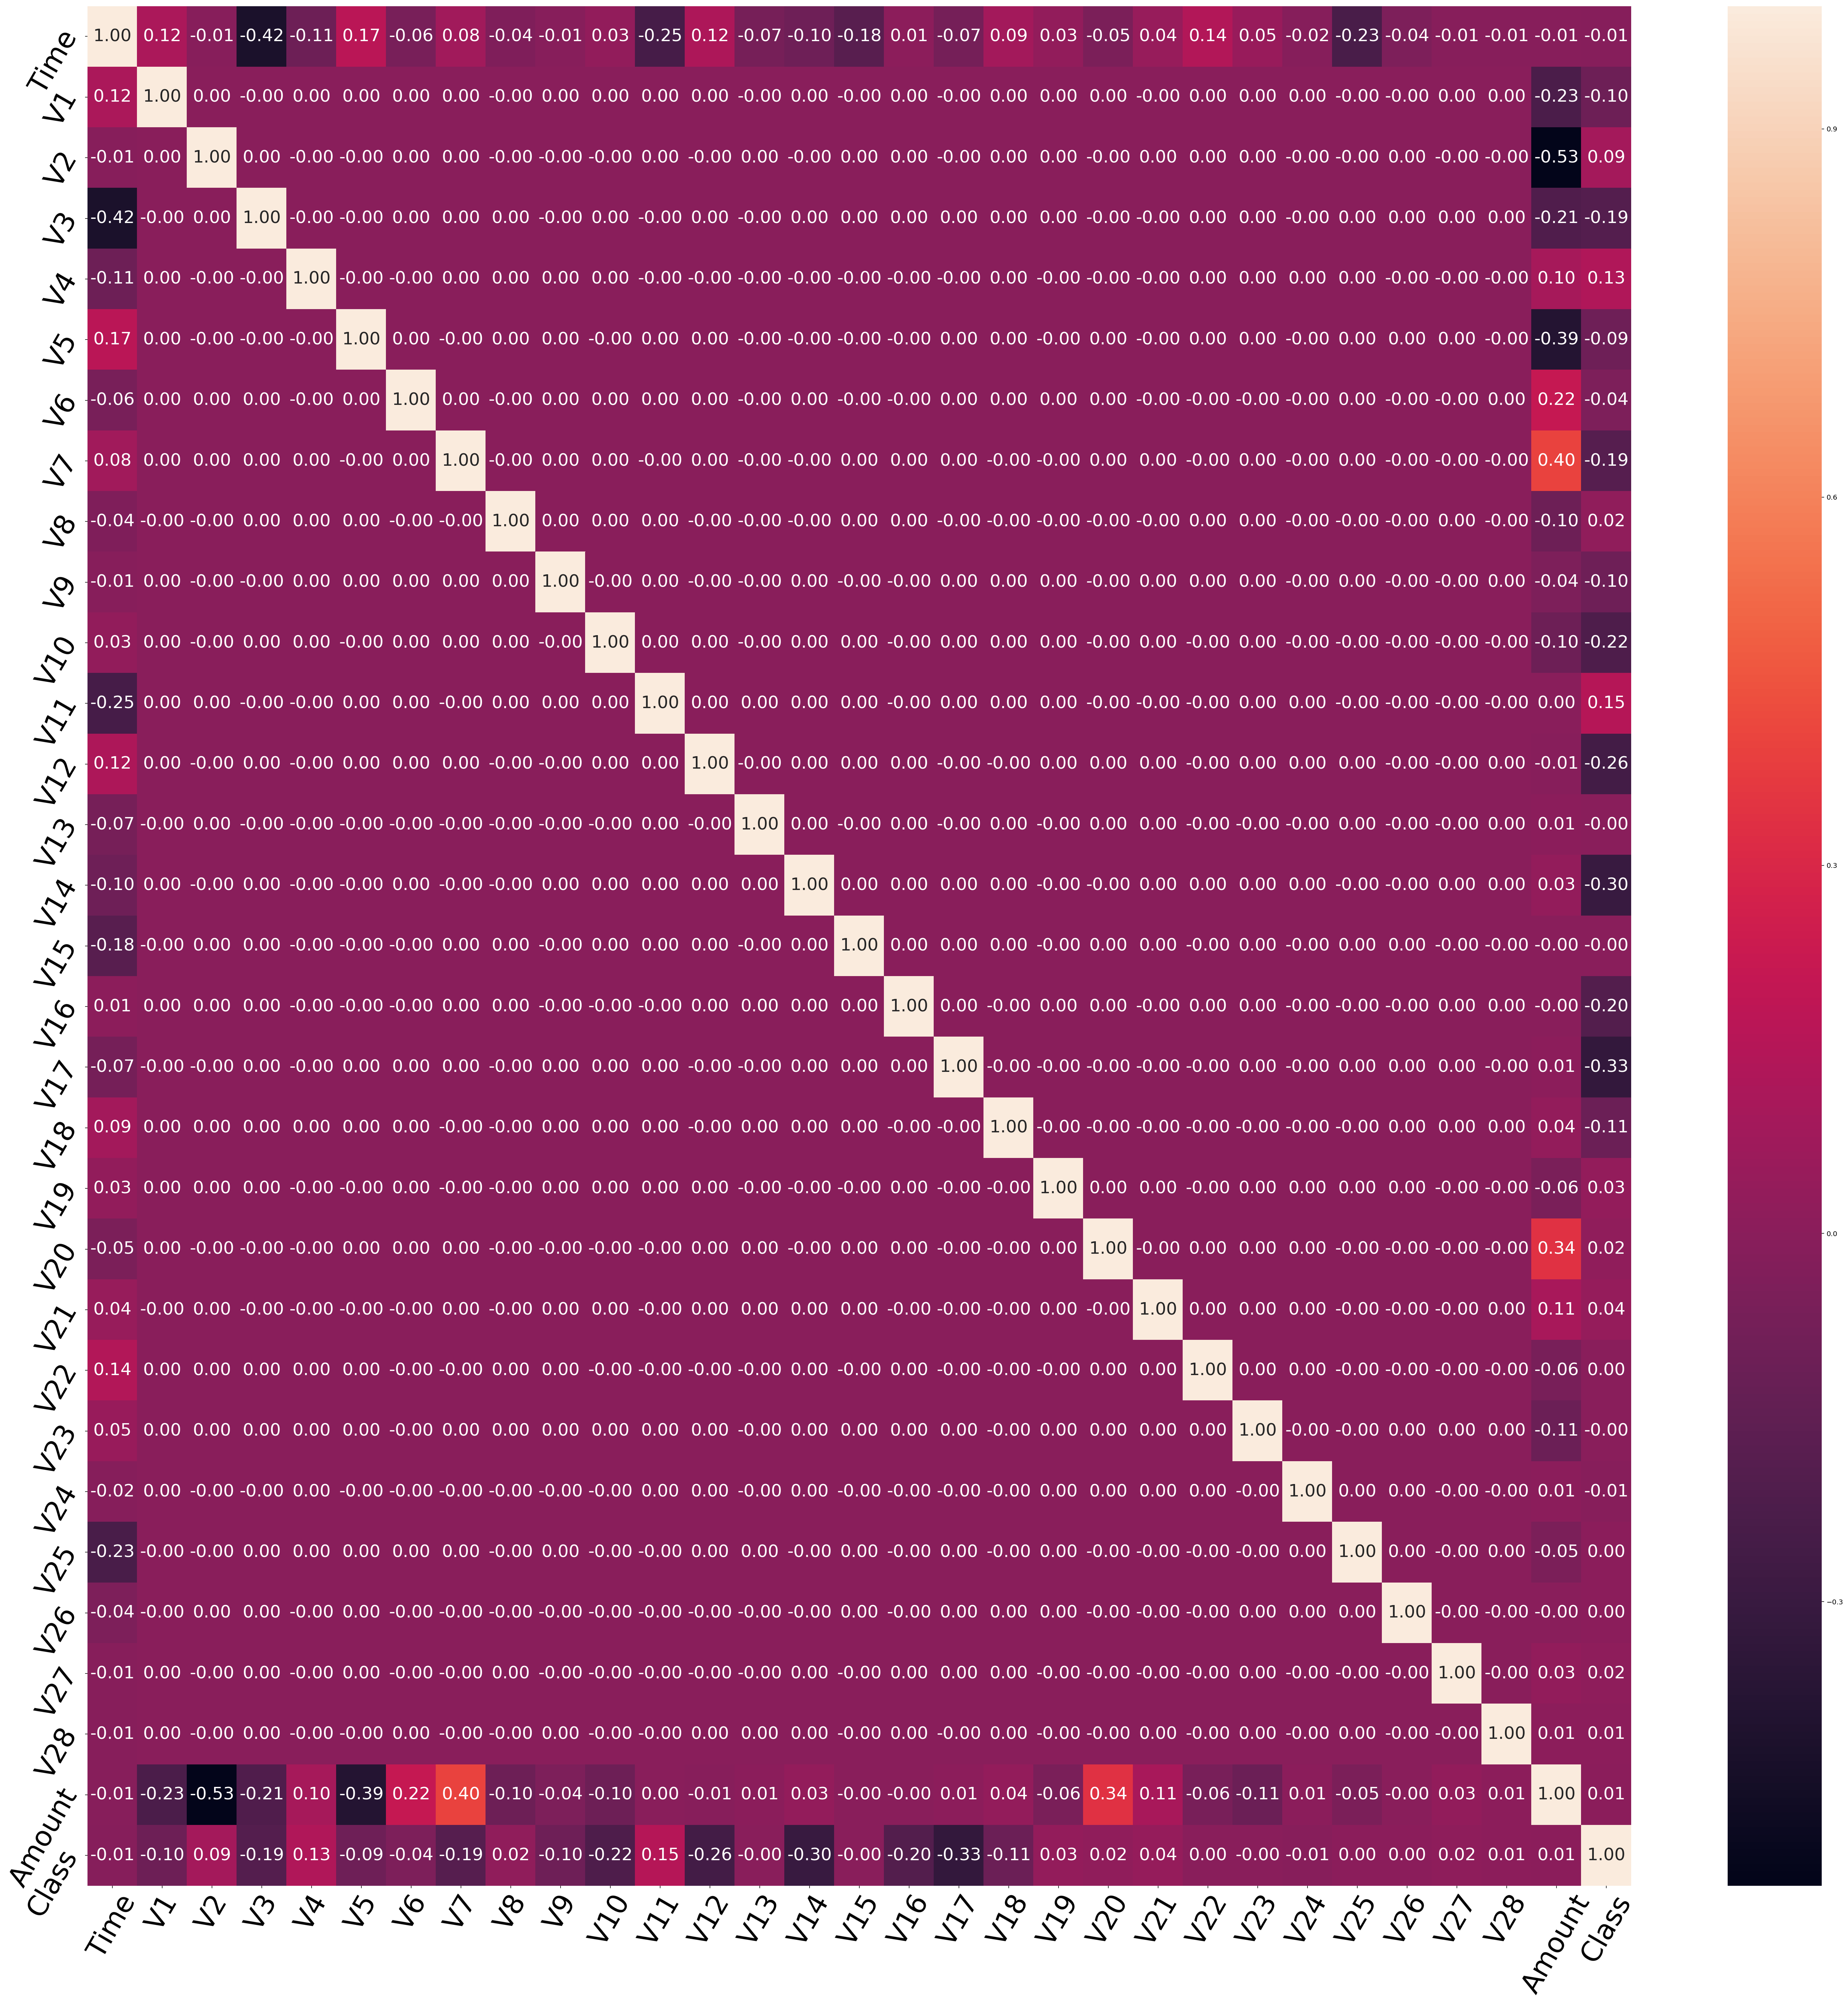

In [101]:
plt.figure(figsize=(50,50))
a = sns.heatmap(data.corr(),annot=True, fmt=".2f", annot_kws={"size": 25})
a.set_xticklabels(a.get_xticklabels(), rotation=60)
a.set_yticklabels(a.get_yticklabels(),rotation = 60)
a.tick_params(labelsize=40)
plt.show()

|Number of features|corelation|
|:----|:----|
|V17|-0.33|
|V14|-0.30|
|V12|-0.26|
|V10|-0.22|
|V16|-0.20|
|V11|0.15|

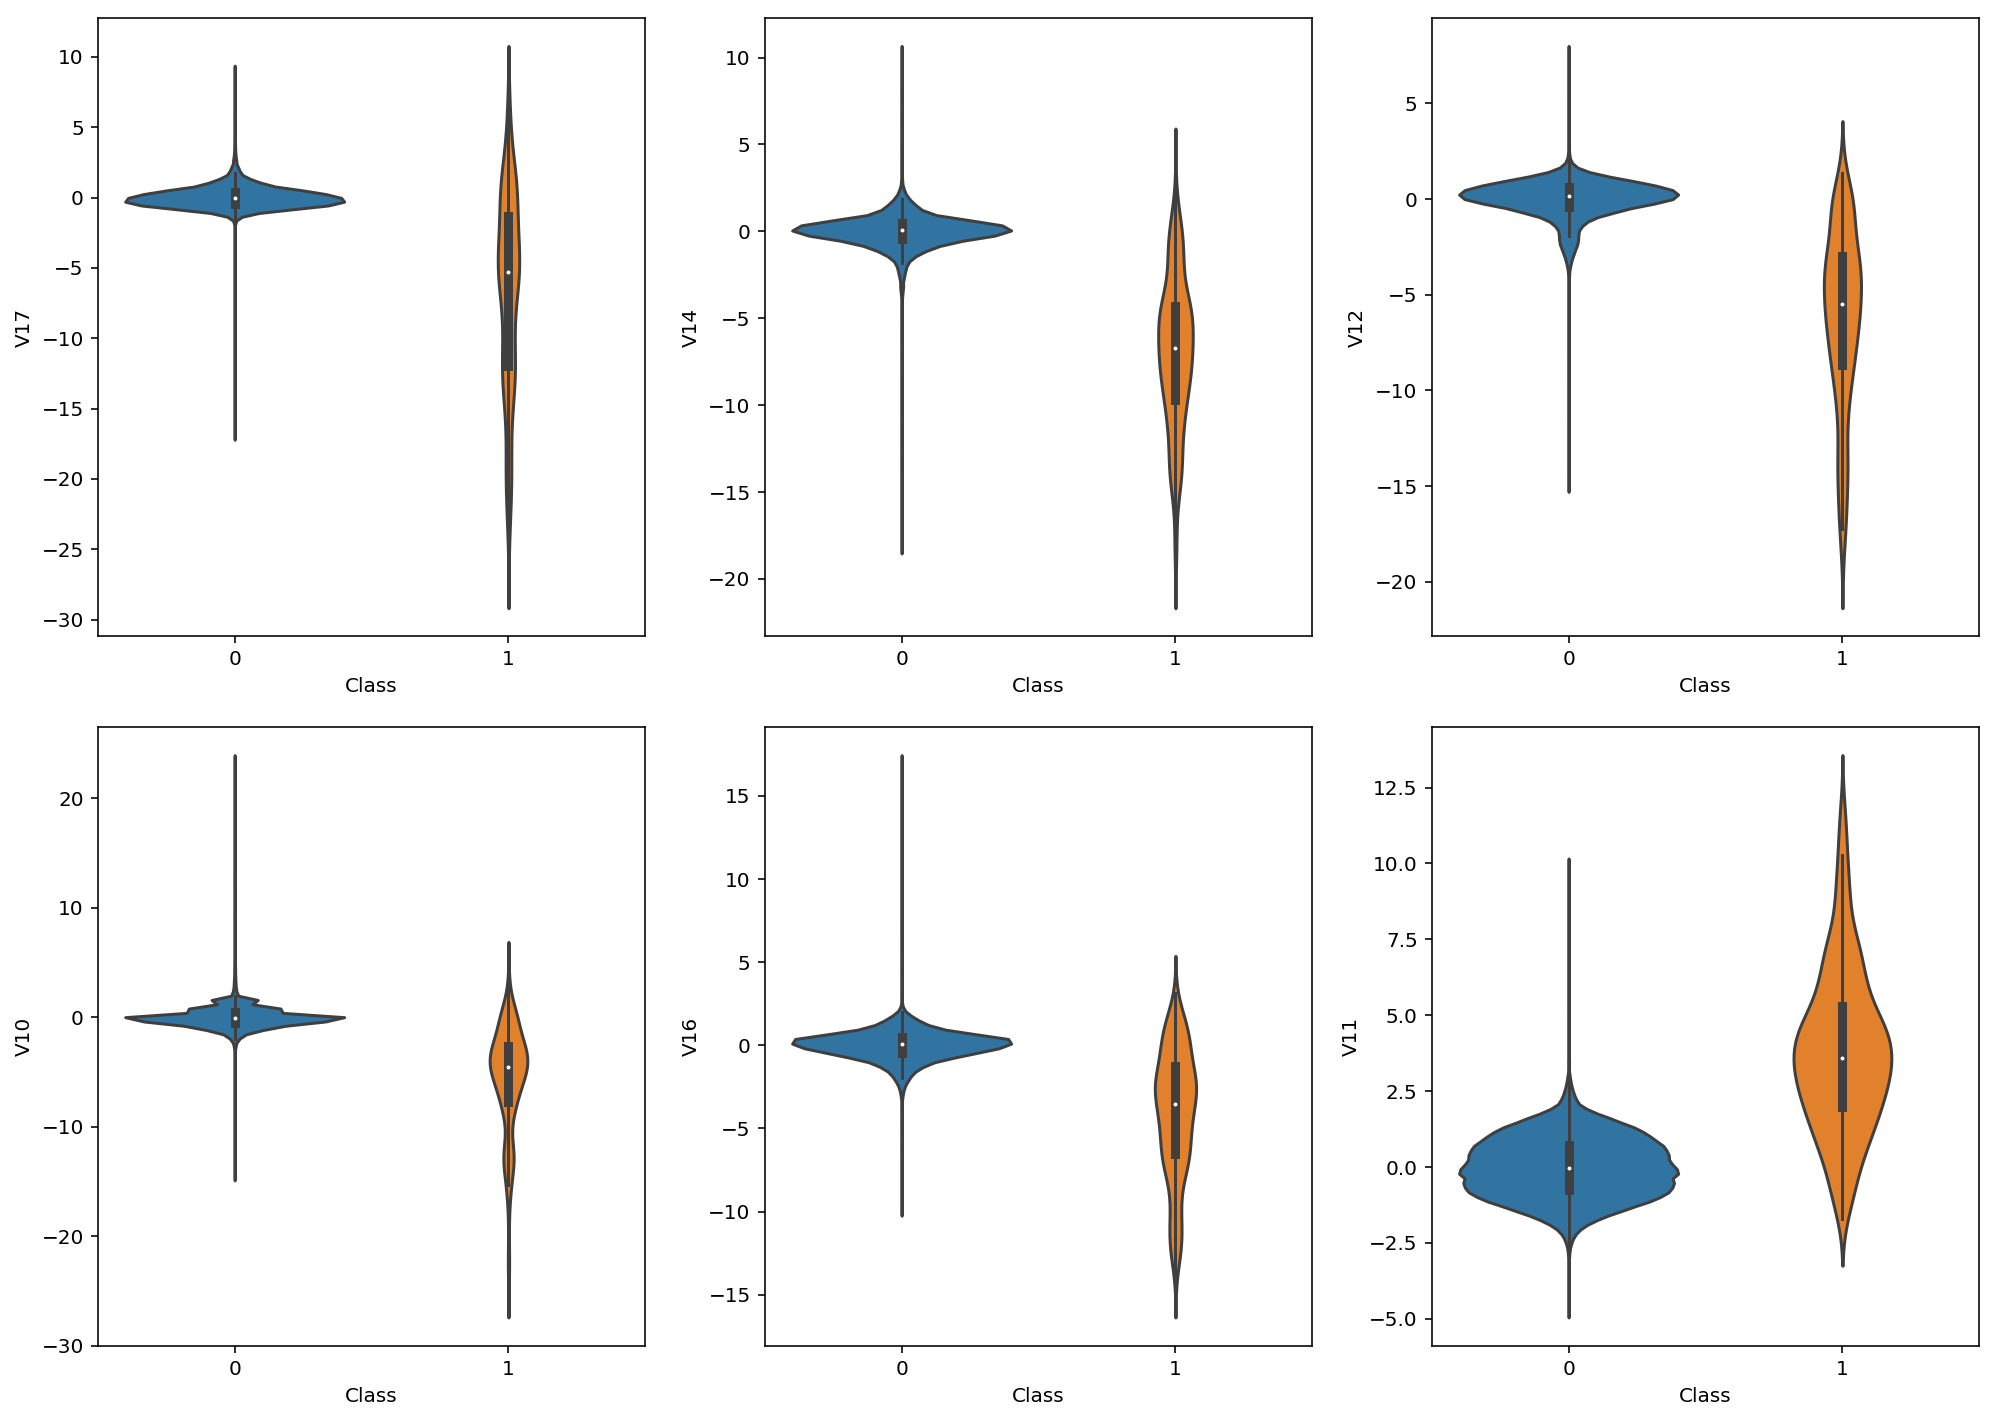

In [103]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(figsize=(14,10), nrows=2, ncols=3)
sns.violinplot(x='Class', y='V17', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax1)
sns.violinplot(x='Class', y='V14', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax2)
sns.violinplot(x='Class', y='V12', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax3)
sns.violinplot(x='Class', y='V10', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax4)
sns.violinplot(x='Class', y='V16', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax5)
sns.violinplot(x='Class', y='V11', data=data, fit_reg=False, scatter_kws={'alpha': 0.5}, ax = ax6)
plt.tight_layout()